##Building a k-NN Model for Classification


#####Title:Create a k-NN classification model using the features provided in the dataset to forecast the likelihood that a user will take a product.

###Hypothesis

#### The majority of customers will be those who are traveling and taking products.

#Background
###A well-known dataset in the field of machine learning is the Customer Behavior Tourism dataset. It includes measurements of different customer behavior in the tourism industry, such as the number of likes on outstation check-in givens, the daily average minutes spent on the travel page, the rating of the travel network, the member of the family, the annual average view on the travel page, the preferred device, and the taken product. Using a variety of features from the dataset, the objective is to categorize tourist customer behavior based on the likelihood that a user will purchase a product.

##Import necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay,f1_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

##Load Data

In [ ]:
df=pd.read_csv('Customer behaviour Tourism.csv')

##Data Preprocessing

In [ ]:
#display the first 5 dataset
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [ ]:
#display the last 5 dataset
df.tail()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0
11759,1011760,No,270.0,Tab,22025.0,8,3,Historical site,104.0,4470,2,No,29,No,1,0.0,14.0


In [ ]:
#display the number of rows and columns in the data
df.shape

(11760, 17)

In [ ]:
#display columns in the dataset
df.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [ ]:
#get basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
#summary statistics of numerical values
df.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11759.000000,11759.000000
mean,1.005880e+06,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.660884,2.712755,0.793945,13.817757
std,3.394964e+03,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660793,1.082909,0.851828,9.070974
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,4.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,10.000000,3.000000,270.000000


In [ ]:
#summary statitics of categorical values
df.describe(include='O')

,Taken_product,preferred_device,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,following_company_page,working_flag
count,11760,11707,11685,11760,11729,11657,11760
unique,2,10,30,7,15,5,3
top,No,Tab,1,3,Beach,No,No
freq,9864,4172,4543,4561,2424,8355,9951


In [ ]:
#check null values
df.isnull().sum().sum()

1432

In [ ]:
#identify data types of each column in the dataset
df.dtypes

UserID                                            int64
Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                   object
member_in_family                                 object
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin                int64
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                         int64
Adult_flag                                      float64
Daily_Avg_mins_spend_on_traveling_page          float64
dtype: object

In [ ]:
#identify categorial feature
categorical=['Taken_product','preferred_device','yearly_avg_Outstation_checkins','member_in_family',
             'preferred_location_type','following_company_page','working_flag']

In [ ]:
#call the numerical columns
numerical=['UserID','Yearly_avg_view_on_travel_page','total_likes_on_outstation_checkin_given',
           'Yearly_avg_comment_on_travel_page','total_likes_on_outofstation_checkin_received',
           'week_since_last_outstation_checkin','montly_avg_comment_on_company_page','travelling_network_rating',
             'Adult_flag','Daily_Avg_mins_spend_on_traveling_page' ]

In [ ]:
#chec null values for categorical columns
df[categorical].isnull().sum()

Taken_product                       0
preferred_device                   53
yearly_avg_Outstation_checkins     75
member_in_family                    0
preferred_location_type            31
following_company_page            103
working_flag                        0
dtype: int64

In [ ]:
# Impute missing values

# For categorical columns using mode

df['yearly_avg_Outstation_checkins'].fillna(df['yearly_avg_Outstation_checkins'].mode()[0], inplace=True)
df['preferred_device'].fillna(df['preferred_device'].mode()[0], inplace=True)
df['preferred_location_type'].fillna(df['preferred_location_type'].mode()[0], inplace=True)
df['following_company_page'].fillna(df['following_company_page'].mode()[0], inplace=True)

In [ ]:
#check null values for categorial values
df[categorical].isnull().sum()

Taken_product                     0
preferred_device                  0
yearly_avg_Outstation_checkins    0
member_in_family                  0
preferred_location_type           0
following_company_page            0
working_flag                      0
dtype: int64

In [ ]:
#check null values numerical values
df[numerical].isnull().sum()

UserID                                            0
Yearly_avg_view_on_travel_page                  581
total_likes_on_outstation_checkin_given         381
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
montly_avg_comment_on_company_page                0
travelling_network_rating                         0
Adult_flag                                        1
Daily_Avg_mins_spend_on_traveling_page            1
dtype: int64

In [ ]:
# Imputing missing values

# For  numerical columns using mean

df['Yearly_avg_view_on_travel_page'].fillna(df['Yearly_avg_view_on_travel_page'].mean(), inplace=True)
df['total_likes_on_outstation_checkin_given'].fillna(df['total_likes_on_outstation_checkin_given'].mean(), inplace=True)
df['Yearly_avg_comment_on_travel_page'].fillna(df['Yearly_avg_comment_on_travel_page'].mean(), inplace=True)
df['Adult_flag'].fillna(df['Adult_flag'].mean(), inplace=True)
df['Daily_Avg_mins_spend_on_traveling_page'].fillna(df['Daily_Avg_mins_spend_on_traveling_page'].mean(), inplace=True)

In [ ]:
#check null values for numerical columns
df[numerical].isnull().sum()

UserID                                          0
Yearly_avg_view_on_travel_page                  0
total_likes_on_outstation_checkin_given         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
montly_avg_comment_on_company_page              0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [ ]:
#check null values for the whole dataset
df.isnull().sum().sum()

0

In [ ]:
#check duplicated in dataset
df.duplicated().sum()

0

##knn classiffier model

In [ ]:
# using one-hot encoding to encode categorical columns
df_encoded= pd.get_dummies(df, columns=['preferred_device', 'yearly_avg_Outstation_checkins',
       'member_in_family', 'preferred_location_type', 'following_company_page','working_flag'])

In [ ]:
df_encoded.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,...,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,following_company_page_0,following_company_page_1,following_company_page_No,following_company_page_Yes,following_company_page_Yeso,working_flag_0,working_flag_No,working_flag_Yes
0,1000001,Yes,307.0,38570.0,94.0,5993,8,11,1,0.0,...,0,0,0,0,0,1,0,0,1,0
1,1000002,No,367.0,9765.0,61.0,5130,1,23,4,1.0,...,0,0,0,0,1,0,0,0,0,1
2,1000003,Yes,277.0,48055.0,92.0,2090,6,15,2,0.0,...,0,0,0,0,0,1,0,0,1,0
3,1000004,No,247.0,48720.0,56.0,2909,1,11,3,0.0,...,0,0,0,0,0,1,0,0,1,0
4,1000005,No,202.0,20685.0,40.0,3468,9,12,4,1.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Replace 'Yes' with 1 and 'No' with 0 in the Taken_Product column
df_encoded['Taken_product'] = df_encoded['Taken_product'].replace({'Yes': 1, 'No': 0})

In [ ]:
df_encoded.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,...,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,following_company_page_0,following_company_page_1,following_company_page_No,following_company_page_Yes,following_company_page_Yeso,working_flag_0,working_flag_No,working_flag_Yes
0,1000001,1,307.0,38570.0,94.0,5993,8,11,1,0.0,...,0,0,0,0,0,1,0,0,1,0
1,1000002,0,367.0,9765.0,61.0,5130,1,23,4,1.0,...,0,0,0,0,1,0,0,0,0,1
2,1000003,1,277.0,48055.0,92.0,2090,6,15,2,0.0,...,0,0,0,0,0,1,0,0,1,0
3,1000004,0,247.0,48720.0,56.0,2909,1,11,3,0.0,...,0,0,0,0,0,1,0,0,1,0
4,1000005,0,202.0,20685.0,40.0,3468,9,12,4,1.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
#identify target value of the data
y= df_encoded['Taken_product']
#identify features of the data
X= df_encoded.drop('Taken_product', axis=1)

In [ ]:
# Scale numerical columns using MinMaxScaler
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(X)
X=pd.DataFrame(scaled_df,columns=X.columns)
X.head()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page,...,preferred_location_type_Tour and Travel,preferred_location_type_Trekking,following_company_page_0,following_company_page_1,following_company_page_No,following_company_page_Yes,following_company_page_Yeso,working_flag_0,working_flag_No,working_flag_Yes
0,0.000000,0.634033,0.140641,0.112069,0.261545,0.727273,0.014113,0.000000,0.000000,0.029630,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000085,0.773893,0.024894,0.071429,0.216257,0.090909,0.038306,0.333333,0.333333,0.037037,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.000170,0.564103,0.178755,0.109606,0.056728,0.545455,0.022177,0.111111,0.000000,0.025926,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000255,0.494172,0.181427,0.065271,0.099706,0.090909,0.014113,0.222222,0.000000,0.029630,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000340,0.389277,0.068774,0.045567,0.129041,0.818182,0.016129,0.333333,0.333333,0.022222,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#split the dataset into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42, stratify=y)

#check the shape of splitted testing and training
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (9408, 80)
Input Test: (2352, 80)
Output Training: (9408,)
Output Test: (2352,)


In [ ]:
# Create a KNN classifier when k=5
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions using test set
y_pred = knn.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8975340136054422


In [ ]:
# Generate classification report(precision, recall, f1-score and support) for k=5
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1973
           1       0.71      0.61      0.66       379

    accuracy                           0.90      2352
   macro avg       0.82      0.78      0.80      2352
weighted avg       0.89      0.90      0.89      2352



In [ ]:
# Confusion matrix for k=5
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1881   92]
 [ 149  230]]


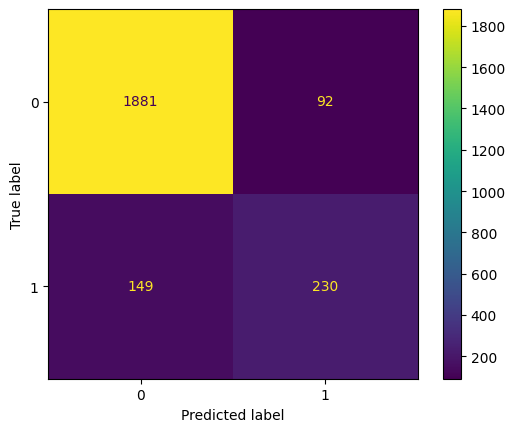

In [ ]:
# Create a confusion matrix to visualize the results of the classification mode for  k=5
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)
# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)
# Plot confusion matrix
log_disp.plot()
# Display plot
plt.show()

In [ ]:
k_values = [1, 3, 7, 17, 23, 55, 101, 179,331]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy for k = {k}: {accuracy}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy for k = 1: 0.9804421768707483
Confusion Matrix:
 [[1950   23]
 [  23  356]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1973
           1       0.94      0.94      0.94       379

    accuracy                           0.98      2352
   macro avg       0.96      0.96      0.96      2352
weighted avg       0.98      0.98      0.98      2352

Accuracy for k = 3: 0.9506802721088435
Confusion Matrix:
 [[1924   49]
 [  67  312]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1973
           1       0.86      0.82      0.84       379

    accuracy                           0.95      2352
   macro avg       0.92      0.90      0.91      2352
weighted avg       0.95      0.95      0.95      2352

Accuracy for k = 7: 0.8584183673469388
Confusion Matrix:
 [[1880   93]
 [ 240  139]]
Classification Report:
               preci

In [ ]:
# Perform cross-validation for each K value

k_values=[1, 3, 7, 17, 23, 55, 101, 179,331]
mean_accuracy_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    accuracy_scores = cross_val_score(knn_classifier, X, y, cv=5)  # 5-fold cross-validation
    mean_accuracy = np.mean(accuracy_scores)
    mean_accuracy_scores.append(mean_accuracy)
    print("k:",k)
    print("mean_accuracy_scores:",mean_accuracy_scores)

k: 1
mean_accuracy_scores: [0.9872448979591837]
k: 3
mean_accuracy_scores: [0.9872448979591837, 0.9797619047619047]
k: 7
mean_accuracy_scores: [0.9872448979591837, 0.9797619047619047, 0.8897108843537413]
k: 17
mean_accuracy_scores: [0.9872448979591837, 0.9797619047619047, 0.8897108843537413, 0.8622448979591837]
k: 23
mean_accuracy_scores: [0.9872448979591837, 0.9797619047619047, 0.8897108843537413, 0.8622448979591837, 0.8554421768707483]
k: 55
mean_accuracy_scores: [0.9872448979591837, 0.9797619047619047, 0.8897108843537413, 0.8622448979591837, 0.8554421768707483, 0.8441326530612245]
k: 101
mean_accuracy_scores: [0.9872448979591837, 0.9797619047619047, 0.8897108843537413, 0.8622448979591837, 0.8554421768707483, 0.8441326530612245, 0.8407312925170067]
k: 179
mean_accuracy_scores: [0.9872448979591837, 0.9797619047619047, 0.8897108843537413, 0.8622448979591837, 0.8554421768707483, 0.8441326530612245, 0.8407312925170067, 0.8391156462585034]
k: 331
mean_accuracy_scores: [0.9872448979591837,

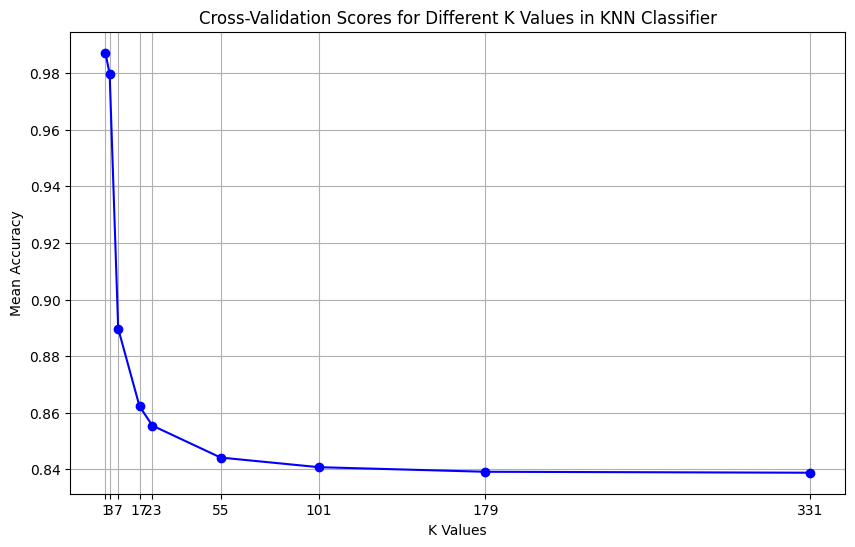

In [ ]:
# Plotting cross-validation scores for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracy_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('K Values')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation Scores for Different K Values in KNN Classifier')
plt.xticks(k_values)
plt.grid(True)
plt.show()


* Taken product column have count of 11760 having two unique words 'Yes' and 'No'.'No' is the appeared more frequently with 9864 instances.
* To perform data cleaning and manage missing values in the dataset , the dataset was divided into numerical and categorical columns.
*   Located 1432 missing values, then replaced them in each category
column with the corresponding mode and the numerical columns with the corresponding mean.
*  Encode the categorical columns, Split the dataset into features (X) and Taken product (y) then scale them.Split data into testing and training sets and choose different k-value to fit and predict the x-test and lastly evaluate the model.



##Conclusion
Findings based on k classifierequals to 5: A score of 90% for accuracy indicates that the model can generally classify occurrences properly.
the Taken product(Yes) ,demonstrated outstanding recall and precision, with an F1-score of 0.94, proving the model's ability to correctly predict occurrences of this category. Taken product(No) recall was marginally lower than its precision, which was moderate at 71%, indicating that the model could more effectively identify occurrences of this class.

Confusion matrix: The model perform nearlty perfect ,identified 230 consumers who traveled and took products, 149 who traveled but did not take products, 92 who did not travel but did take things, and 1881 who did not travel nor take products.



An indication of the trade-off between bias and variance is a KNN classifier's declining accuracy as K values increase. Bigger K values can cause underfitting or oversimplification, whereas smaller K values might cause overfitting. Cross-validation was subsequently used, and it predicted more accuracy than the other model.The model that is subjected to cross-validation will therefore function more effectively than the other model.